# 语言文化背景分布

In [2]:
import pandas as pd
import os

# Define file paths
file_paths = {
    "black_myth_comments": "./black_myth_Commemts.xlsx",
    "liziqi_comments": "./liziqi_Commemts.xlsx",
    "black_myth_comments_language": "./black_myth_Comments_language.xlsx",
    "liziqi_comments_language": "./liziqi_Comments_language.xlsx",
    "black_myth_main_data": "./black_myth_MainData.xlsx",
    "liziqi_main_data": "./liziqi_MainData.xlsx",
    "black_myth_main_data_language": "./black_myth_maindata_language.xlsx",
    "liziqi_main_data_language": "./liziqi_maindata_language.xlsx"
}

# Load files into dataframes
dataframes = {key: pd.read_excel(os.path.join(os.getcwd(), "data", file_path)) for key, file_path in file_paths.items()}

# Display information about loaded dataframes
for key, df in dataframes.items():
    print(f"Dataframe '{key}' loaded with {df.shape[0]} rows and {df.shape[1]} columns.")

# dataframes  # The dictionary containing all loaded dataframes


Dataframe 'black_myth_comments' loaded with 8736 rows and 8 columns.
Dataframe 'liziqi_comments' loaded with 568 rows and 8 columns.
Dataframe 'black_myth_comments_language' loaded with 7745 rows and 2 columns.
Dataframe 'liziqi_comments_language' loaded with 457 rows and 2 columns.
Dataframe 'black_myth_main_data' loaded with 852 rows and 7 columns.
Dataframe 'liziqi_main_data' loaded with 229 rows and 7 columns.
Dataframe 'black_myth_main_data_language' loaded with 824 rows and 2 columns.
Dataframe 'liziqi_main_data_language' loaded with 137 rows and 2 columns.


In [3]:
# 对于所有comment数据，去掉content中开头的@到第一个空格之间的内容
def remove_at_sign(df):
    df['content'] = df['content'].str.replace(r'^@.*?\s', '', regex=True)
    return df

dataframes['black_myth_comments'] = remove_at_sign(dataframes['black_myth_comments'])
dataframes['liziqi_comments'] = remove_at_sign(dataframes['liziqi_comments'])

In [4]:
dataframes.keys()

dict_keys(['black_myth_comments', 'liziqi_comments', 'black_myth_comments_language', 'liziqi_comments_language', 'black_myth_main_data', 'liziqi_main_data', 'black_myth_main_data_language', 'liziqi_main_data_language'])

In [5]:
# 将black_myth的language数据合并,只包括content language
black_myth_comments_language = dataframes['black_myth_comments_language']
black_myth_language = dataframes['black_myth_main_data_language']
black_myth_language = pd.concat([black_myth_language, black_myth_comments_language], axis=0)

# 将liziqi的language数据合并,只包括content language
liziqi_comments_language = dataframes['liziqi_comments_language']
liziqi_language = dataframes['liziqi_main_data_language']
liziqi_language = pd.concat([liziqi_language, liziqi_comments_language], axis=0)



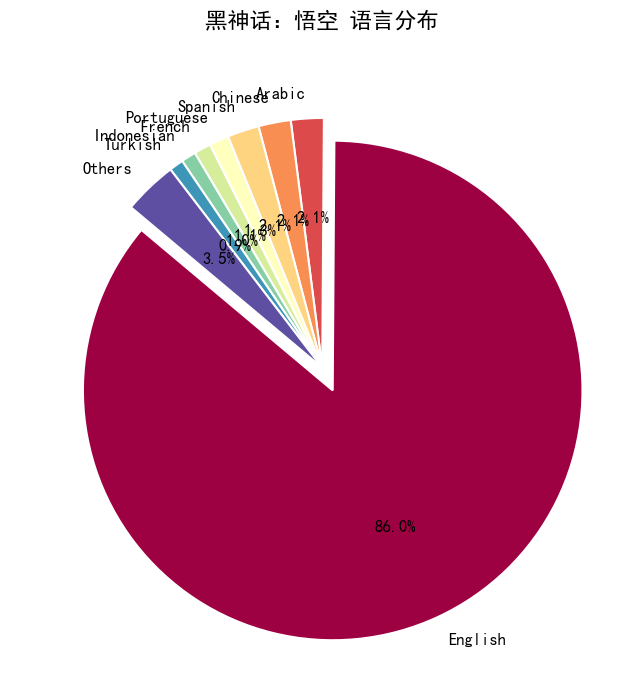

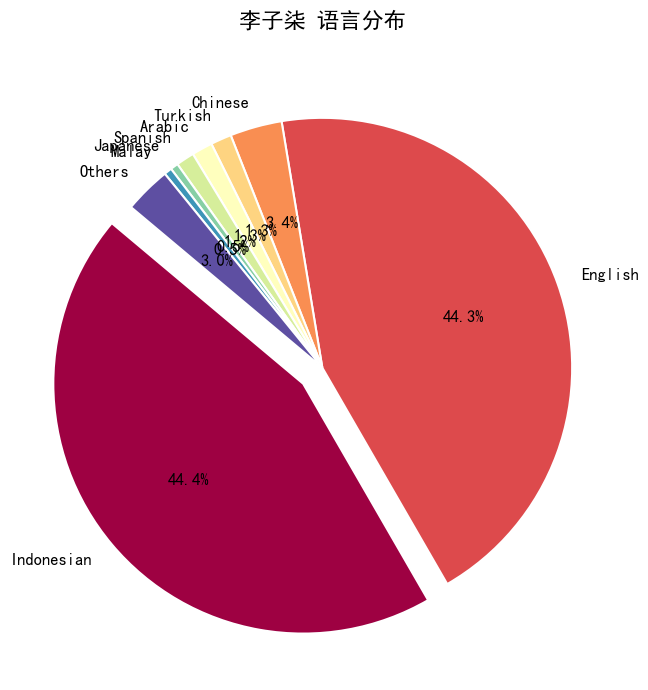

In [9]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from matplotlib import cm
from matplotlib import font_manager as fm

# 设置字体
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False

def plot_language_pie(data, column, title, output_path=None):
    """
    绘制语言分布的精美饼图
    :param data: 数据 DataFrame
    :param column: 语言列名
    :param title: 图表标题
    :param output_path: 输出路径
    """
    # 数据处理，统计语言分布
    language_counts = data[column].value_counts()
    top_languages = language_counts.head(8)  # 只显示前8个
    others = language_counts.iloc[8:].sum()  # 其他语言归为"Others"
    top_languages["Others"] = others

    # 生成颜色
    colors = cm.Spectral(np.linspace(0, 1, len(top_languages)))

    # 设置图表字体大小
    proptease = fm.FontProperties()
    proptease.set_size('large')

    # 绘制饼图
    fig, ax = plt.subplots(figsize=(10, 7))
    wedges, texts, autotexts = ax.pie(
        top_languages,
        labels=top_languages.index,
        autopct="%1.1f%%",
        startangle=140,
        colors=colors,
        explode=[0.1] + [0] * (len(top_languages) - 1),  # 突出显示第一个语言
        wedgeprops={"edgecolor": "white", "linewidth": 1.5},  # 美化边界
    )

    # 美化文本
    for text in texts:
        text.set_fontproperties(proptease)
    for autotext in autotexts:
        autotext.set_fontproperties(proptease)
        autotext.set_color("black")

    # 标题和布局调整
    ax.set_title(title, fontsize=16, fontweight="bold", pad=20)
    plt.tight_layout()

    # 保存图表
    if output_path:
        plt.savefig(output_path, dpi=300, bbox_inches="tight")
    plt.show()

# 使用示例
plot_language_pie(
    black_myth_language,
    column="language",
    title="黑神话：悟空 语言分布",
    output_path="black_myth_language_pie.png"
)

plot_language_pie(
    liziqi_language,
    column="language",
    title="李子柒 语言分布",
    output_path="liziqi_language_pie.png"
)


In [5]:
liziqi_language

,content,language
0,Liziqi yıllar sonra YouTube'a video atmış çok ...,Turkish
1,Li Ziqi: The Internet is really different from...,Chinese
2,Ready vip c salma salsabil pink sc liziqi,English
3,Jujur kangen Liziqi,Indonesian
4,VIP C bahlil csat liziqi ready vcs kemurahan,Indonesian
...,...,...
452,احلى خبر 😭😭😭\nبس انقهرت لما عرفت ان فيه شركه ا...,Arabic
453,&lt;- one of the international fans :') https:...,English
454,@FallingIntoFilm Reallllly like it or maybe I’...,English
455,@Nivivacious damn just about to sit down for t...,English


In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate emotion proportions
emotion_counts = black_myth_language['language'].value_counts()
emotion_proportions = emotion_counts / emotion_counts.sum()

# Create a DataFrame for better visualization
emotion_df = pd.DataFrame({
    'Language': emotion_counts.index,
    'Count': emotion_counts.values,
    'Proportion': emotion_proportions.values.round(2)
})

print("Language Proportions:")
print(emotion_df)


Language Proportions:
                   Language  Count  Proportion
0                   English   7368        0.86
1                    Arabic    182        0.02
2                   Chinese    179        0.02
3                   Spanish    176        0.02
4                Portuguese    108        0.01
5                    French     94        0.01
6                Indonesian     82        0.01
7                   Turkish     79        0.01
8                  Japanese     60        0.01
9                      Thai     48        0.01
10                    Hindi     38        0.00
11                   Polish     26        0.00
12                    Malay     24        0.00
13               Vietnamese     11        0.00
14                   German     11        0.00
15         English, Chinese      7        0.00
16                  Unknown      7        0.00
17                  Russian      6        0.00
18                   Korean      6        0.00
19                  Español      5    

In [7]:
# 合并emotion数据，只包括comment和main data的content、emotion、publish_time（pub_time）
black_myth_comments = dataframes['black_myth_comments']
black_myth_comments = black_myth_comments[['content', 'emotion', 'pub_time']]
black_myth_comments.columns = ['content', 'emotion', 'publish_time']
black_myth_main_data = dataframes['black_myth_main_data']
black_myth_main_data = black_myth_main_data[['content', 'emotion', 'publish_time']]
black_myth_data = pd.concat([black_myth_comments, black_myth_main_data], axis=0)
black_myth_data


,content,emotion,publish_time
0,Nop,Neutral,2024-08-20 16:44:53
1,THAT MOTHER FUGGER!\n\nHave you killed him yet?,Sarcastic,2024-08-20 19:59:17
2,"Finally, I have been waiting on PS5 confirmati...",Neutral,2024-08-20 17:16:22
3,How's it look in 60fps mode? \nStill good?,Neutral,2024-08-20 16:51:40
4,It's looking good but Ratchet&amp;Clank is jus...,Objective,2024-08-20 16:17:14
...,...,...,...
847,Got this one on the first try in Black Myth: W...,Positive,2024-09-30
848,Black Myth #Wukong is an incredibly inspiring ...,Positive,2024-09-30
849,Does Anyone Really Like Aiden Ross? || Black M...,Objective,2024-09-30
850,Black Myth Wukong Giveaway Last chance To Ente...,Neutral,2024-09-30


In [8]:
# liziqi
liziqi_comments = dataframes['liziqi_comments']
liziqi_comments = liziqi_comments[['content', 'emotion', 'pub_time']]
liziqi_comments.columns = ['content', 'emotion', 'publish_time']
liziqi_main_data = dataframes['liziqi_main_data']
liziqi_main_data = liziqi_main_data[['content', 'emotion', 'publish_time']]
liziqi_data = pd.concat([liziqi_comments, liziqi_main_data], axis=0)
liziqi_data

,content,emotion,publish_time
0,malah diingetin😔 gue udah lupa dahal😔,Disappointment,2024-11-02 10:24:09
1,You know it's time for something else when:\n\...,Objective,2024-03-20 23:28:34
2,Pernah dibahas di channel hirotada tp blm jela...,Objective,2024-11-02 09:48:24
3,oh iya y nder🧐,Neutral,2024-11-02 09:45:48
4,Iya padahal contentnya bagus bagus,Disappointment,2024-11-02 09:47:07
...,...,...,...
224,All is okay on my end because Liziqi is postin...,Positive,2024-11-16
225,Liziqi is back omg,Positive,2024-11-16
226,omg new liziqi uploads,Positive,2024-11-16
227,bugün güne o kadarrrr enerjik başladım ki!!iki...,Positive,2024-11-16


In [9]:
# 统计liziqi和black_myth的emotion分布
black_myth_emotion_counts = black_myth_data['emotion'].value_counts()
black_myth_emotion_counts

emotion
Positive          3795
Neutral           1683
Objective         1649
Sarcastic         1146
Negative           692
Disappointment     242
Hate               173
Contempt           166
Disgust             42
Name: count, dtype: int64

In [10]:
liziqi_emotion_counts = liziqi_data['emotion'].value_counts()
liziqi_emotion_counts

emotion
Positive          413
Neutral           167
Objective         105
Negative           47
Sarcastic          34
Disappointment     25
Hate                4
Contempt            2
Name: count, dtype: int64